In [1]:
import io
import pathlib
import requests
import zipfile

import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

In [3]:
ROOT_DIR = pathlib.Path("..")

EXAMPLES_URL = "https://github.com/KAUST-Academy/python-for-data-analysis/raw/november-2022/examples.zip"

response = requests.get(EXAMPLES_URL)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(ROOT_DIR)

In [4]:
EXAMPLES_DIR = ROOT_DIR / "examples"

# Plotting and Visualization

## Brief introduction to Matplotlib

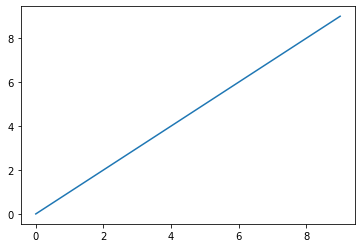

In [5]:
data = np.arange(10)
plt.plot(data)

### Figures and subplots

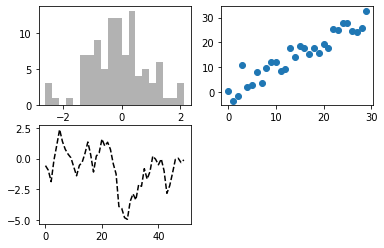

In [13]:
# create a figure
fig = plt.figure()

# add some subplots
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# plot different data on each subplot
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

plt.show()

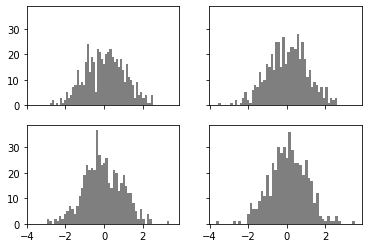

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
#fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

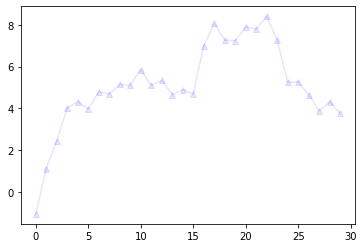

In [18]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="blue",
        linestyle="solid", marker="^", alpha=0.1);

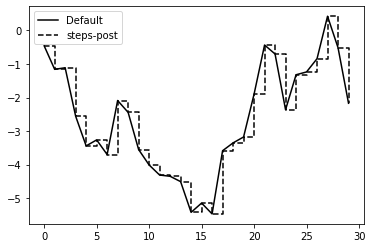

In [21]:
fig = plt.figure()

ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="solid", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

### Ticks, Labels, and Legends

Text(0.5, 1.0, 'My first matplotlib plot')

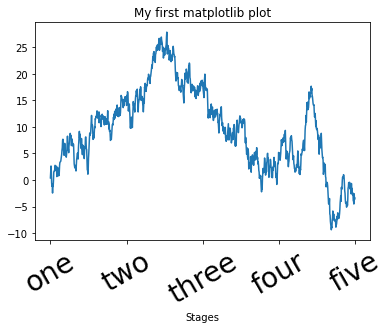

In [28]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# specify our ticks and our labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=28)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

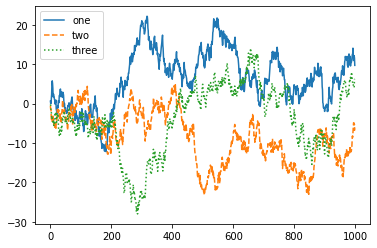

In [30]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), label="one");
ax.plot(np.random.randn(1000).cumsum(), linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), linestyle="dotted",
        label="three");
ax.legend()

### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

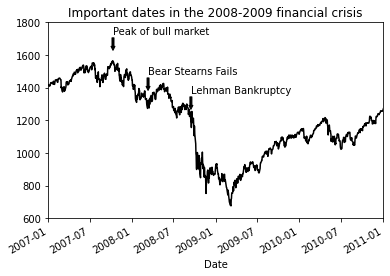

In [31]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv(EXAMPLES_DIR / "spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

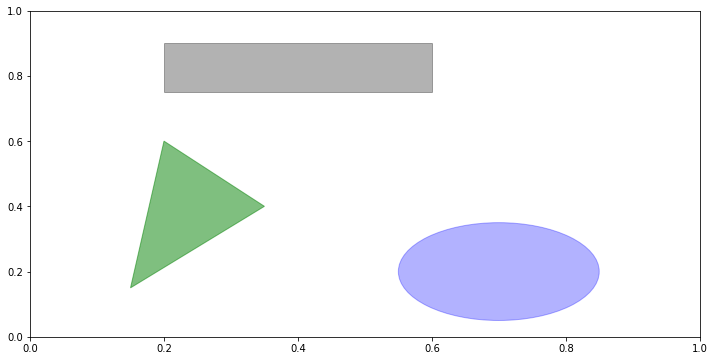

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Plotting with pandas and seaborn

### Line Plots

In [33]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.head()

0     0.472766
10   -0.933432
20   -1.307331
30   -0.536134
40   -0.613487
dtype: float64

<AxesSubplot:>

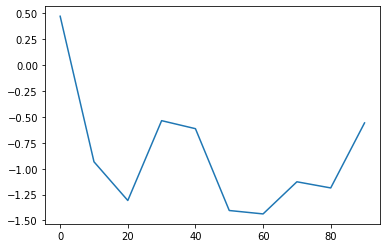

In [34]:
s.plot()

In [35]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))


In [36]:
df.head()

,A,B,C,D
0,0.765159,0.128021,1.579873,0.676028
10,1.117931,-0.132722,3.318126,0.420903
20,-0.291404,0.525604,2.278920,-0.018313
30,-1.364075,1.378347,3.087779,0.246267
40,-1.929864,1.598750,3.382606,1.015381


In [38]:
df.plot?

<AxesSubplot:>

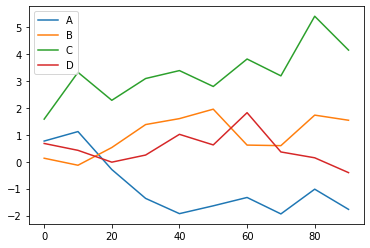

In [37]:
df.plot()

### Bar Plots

<AxesSubplot:>

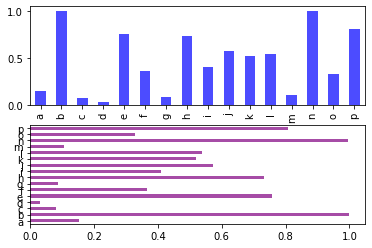

In [39]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="blue", alpha=0.7)
data.plot.barh(ax=axes[1], color="purple", alpha=0.7)

In [40]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.251696,0.395128,0.704913,0.097380
two,0.245736,0.879798,0.693330,0.809935
three,0.946422,0.112219,0.742552,0.363363
four,0.153355,0.838592,0.135084,0.108948
five,0.599780,0.841395,0.981374,0.256368
six,0.815049,0.326970,0.258813,0.077735


<AxesSubplot:>

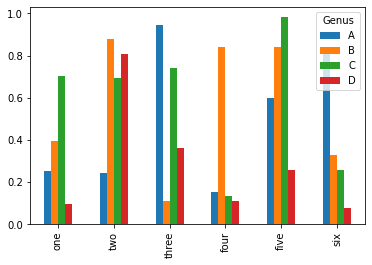

In [41]:
df.plot.bar()

In [ ]:
plt.figure()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
plt.close("all")

In [42]:
tips = pd.read_csv("../examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [43]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [44]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts


size,1,2,3,4,5,6
day,,,,,,
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158


<AxesSubplot:xlabel='day'>

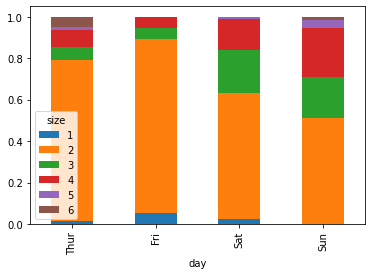

In [45]:
party_pcts.plot.bar(stacked=True)

In [46]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

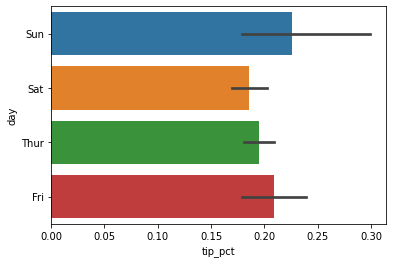

In [47]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

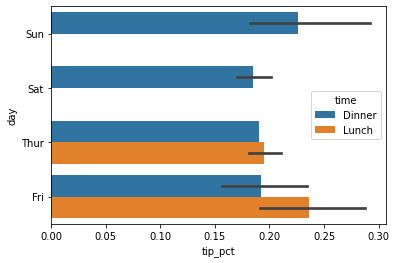

In [48]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

### Histrograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

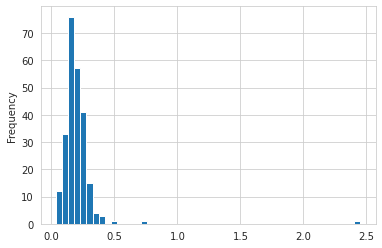

In [57]:
tips["tip_pct"].plot.hist(bins=50)

In [58]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.202123
std,8.902412,1.383638,0.951100,0.163385
min,3.070000,1.000000,1.000000,0.036955
25%,13.347500,2.000000,2.000000,0.148274
50%,17.795000,2.900000,2.000000,0.183110
75%,24.127500,3.562500,3.000000,0.236821
max,50.810000,10.000000,6.000000,2.452381


In [68]:
normal_tip_pcts = tips.loc[:, "tip_pct"] < 0.5
tips.loc[normal_tip_pcts, :].describe()

,total_bill,tip,size,tip_pct
count,242.000000,242.000000,242.000000,242.000000
mean,19.879835,2.985248,2.574380,0.190709
std,8.878018,1.380868,0.953615,0.068453
min,3.070000,1.000000,1.000000,0.036955
25%,13.397500,2.000000,2.000000,0.147498
50%,17.815000,2.855000,2.000000,0.182150
75%,24.222500,3.507500,3.000000,0.234502
max,50.810000,10.000000,6.000000,0.483092


<AxesSubplot:ylabel='Frequency'>

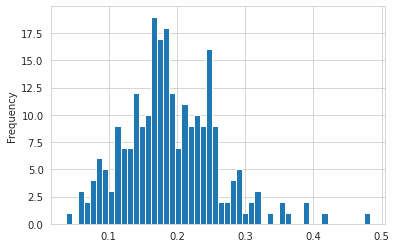

In [69]:
tips.loc[normal_tip_pcts, "tip_pct"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

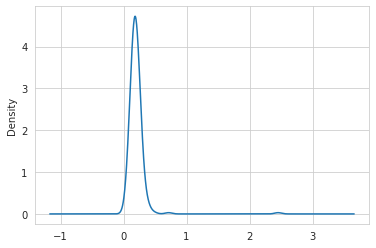

In [65]:
tips["tip_pct"].plot.density()

<AxesSubplot:ylabel='Density'>

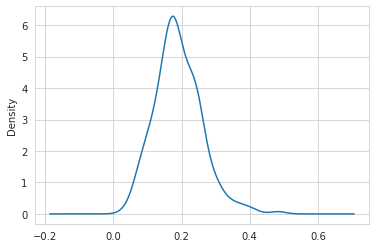

In [70]:
tips.loc[normal_tip_pcts, "tip_pct"].plot.density()

<AxesSubplot:ylabel='Count'>

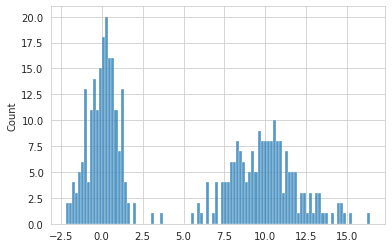

In [71]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100)

### Scatter Plots

In [72]:
macro = pd.read_csv(EXAMPLES_DIR / "macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [73]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


<AxesSubplot:>

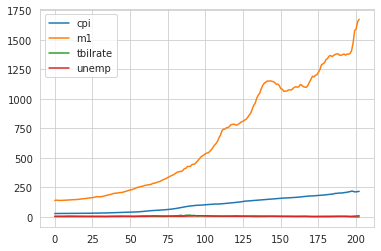

In [74]:
data.plot()

In [77]:
np.log(data).head()

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [83]:
data.diff?

In [86]:
np.log(data).diff(periods=1)

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


<AxesSubplot:>

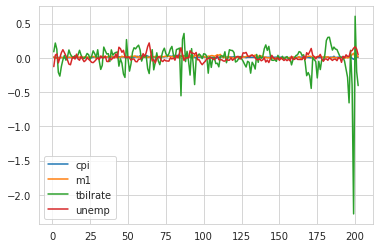

In [87]:
trans_data = np.log(data).diff().dropna()
trans_data.plot()

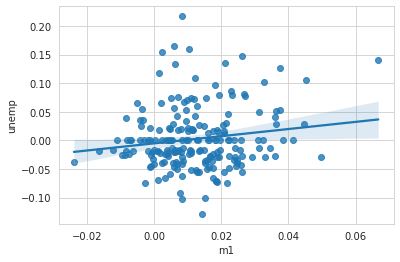

In [90]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)

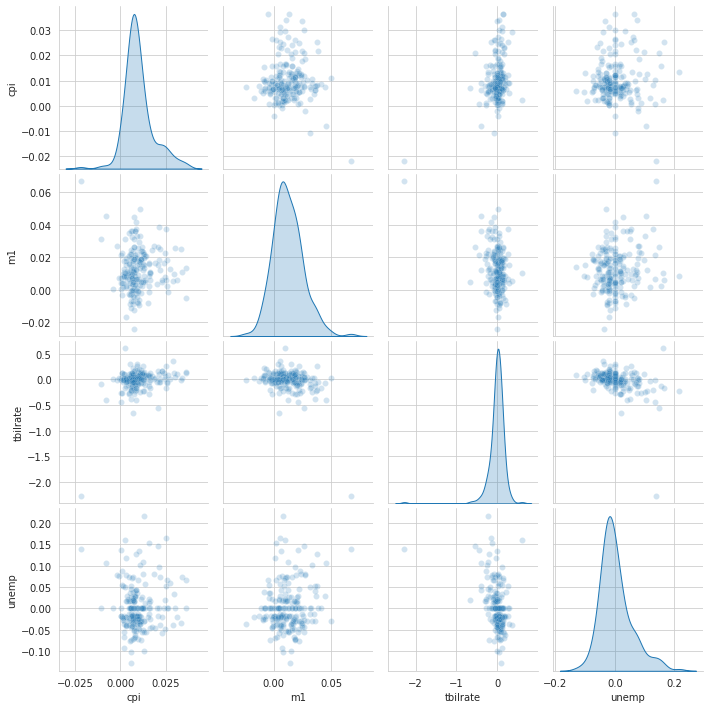

In [91]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

In [ ]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

In [ ]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

In [ ]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])